# Strength Differences in Powerlifting by Gender
Using Powerlifting data from [OpenPowerLifting.org](http://www.openpowerlifting.org/data.html), we will examine the probabilities of a random male competitor being stronger than a random female competitor.

In order to easily follow this report it is important to be familiar with the following terminology:
- **Weight:** A competitor's body weight in kg
- **Lift:** Deadlift, benchpress, and squat are the three "Lifts" in powerlifting. A Lift is the competitor's highest completed "attempt" for each Lift
- **Total:** The Total kg of a competitor's highest completed attempt from each Lift, in a given competition
- **Natural:** Competitors who do NOT use Performance Enhancing Drugs (PEDs)
- **Ehanced:** Competitors who use PEDs


## Questions This Report Answers
We will answer the probability of a random male being stronger than a random female in the following scenarios:

1. Random Natural Competitors
2. Random Enhanced
3. Normalized for Weight
4. Comparing Muscle Groups

## Table of Contents
 
1. **Removing Extraneous Data**
  1. [Reading the Data](#Reading-the-Data)
  2. [Selecting Columns](#Selecting-Columns)
  3. [Filtering Equipment Level](#Filtering-Equipment-Level)
  
  
2. **Fixing Data**
  1. [Tested Vs Untested Competitors](#Tested-Vs-Untested-Competitors)
  2. [Count Each Athlete Once](#Count-Each-Athlete-Once)
  3. [Weight Classes](#Weight-Classes)
  4. [Checking for Data Sufficiency by Group](#Checking-for-Data-Sufficiency-by-Group)
 
  
3.  **The Results**
  1. [Random Male Vs Female](#Random-Male-Vs-Female)
  2. [Enhanced Competitor Sex Differences](#Enhanced-Competitor-Sex-Differences)
  3. [Equalizing for Weight](#Equalizing-for-Weight)
  4. [Strength Differences by Muscle Group](#Strength-Differences-by-Muscle-Group)

# Removing Extraneous Data

## Reading the Data
First import the modules we will need to analyze the data and the raw data.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('openpowerlifting.csv', low_memory = False)

In [3]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


From looking at just the head of the data-frame, we see that some columns are hidden. We need to know all of the data we have access to.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

## Selecting Columns
We are also able to see the response variables ("lifts") broken down into individual attempts, as well as aggregates such as best Lift and Total:
- "Best3SquatKg"
- "Best3BenchKg"
- "Best3DeadliftKg"
- "TotalKg"
  
Finally we can see all of the desired explanatory variables: 
- "Sex"
- "Equipment"
- "BodyweightKg"
- "Tested"

Let's make a new dataframe with only the relevant columns we outlined above, to make future data manipulation faster. We go from 37 columns to 9.

In [5]:
cleaned_columns_df = df[['Name','Best3SquatKg','Best3BenchKg','Best3DeadliftKg',
                         'TotalKg','Sex','Equipment','BodyweightKg','Tested']]

cleaned_columns_df

,Name,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Sex,Equipment,BodyweightKg,Tested
0,Abbie Murphy,105.0,55.0,130.0,290.0,F,Wraps,59.8,NaN
1,Abbie Tuong,120.0,67.5,145.0,332.5,F,Wraps,58.5,NaN
2,Ainslee Hooper,NaN,32.5,NaN,32.5,F,Raw,55.4,NaN
3,Amy Moldenhauer,105.0,72.5,132.5,310.0,F,Wraps,60.0,NaN
4,Andrea Rowan,140.0,80.0,170.0,390.0,F,Wraps,104.0,NaN
...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,175.0,87.5,190.0,452.5,M,Raw,73.5,Yes
1423350,Marian Piwowarczyk,110.0,95.0,170.0,375.0,M,Raw,63.5,Yes
1423351,Andrzej Bryniarski,160.0,100.0,180.0,440.0,M,Raw,94.4,Yes
1423352,Stanisław Goroczko,NaN,NaN,NaN,NaN,M,Raw,80.8,Yes


## Filtering Equipment Level
There are a number of different levels of assistance equipment you can use in powerlifting.

In [6]:
cleaned_columns_df['Equipment'].value_counts()

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64

**Single-ply** has the least amount of variation in equipment and the largest number of records, making this the preferred category. Other categories had the following issues:
- (knee) **Wraps** are used in all single-ply and up power lifting. Some federations allows wraps in Raw and some do not. So for it to be in it's own category, they must mean that it is Raw, except for the addition of wraps. It isn't clear if this category only includes raw + wraps or is x-ply + wraps.
- **Raw** wat first appears the most neutral, as it allows the least amount of equipment. However the inconsistent permissibility of wraps, gives some competitors advantages in the squat, depending on their federation's rules.
- **Multi-ply** employs varying amounts of equipment for each lifter, such as the number of plys, which assists in getting higher Totals.
- **Straps** are not allowed in competition powerlifting unless the lifter has a physical disability requiring them. Additionally the number of lifts done under this condition are negligible.

This will bring us down from 1,423,354 records to 787,141. We can also drop the "Equipment" after having filtered for only Single-ply.

In [7]:
filt = cleaned_columns_df['Equipment'] == 'Single-ply'
single_ply_df = cleaned_columns_df[filt].drop('Equipment', axis=1).reset_index(drop = True)
single_ply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787141 entries, 0 to 787140
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             787141 non-null  object 
 1   Best3SquatKg     623177 non-null  float64
 2   Best3BenchKg     703565 non-null  float64
 3   Best3DeadliftKg  615585 non-null  float64
 4   TotalKg          705450 non-null  float64
 5   Sex              787141 non-null  object 
 6   BodyweightKg     773417 non-null  float64
 7   Tested           728794 non-null  object 
dtypes: float64(5), object(3)
memory usage: 48.0+ MB


# Fixing Data
## Tested Vs Untested Competitors
Bodybuilding and powerlifting are PED (Performance Enhancing Drugs) using sports, by default. There are two different leagues, so that non-PED using atheletes can compete separately. However, since PED use is illegal, they are shy about it in their naming conventions, so you have Bodybuilding and Natural Bodybuilding. And, in the case of powerlifting we seem to have Powerlifting, and Tested Powerlifting. 

For ease of reading going forward, I will rename them "Natural" and "Enhanced" instead of the much less clear "Yes" and NaN.

In [8]:
single_ply_df['Tested'].fillna('Enhanced', inplace = True)
single_ply_df['Tested'].replace('Yes', 'Natural', inplace = True)
single_ply_df['Tested'].value_counts()

Natural     728794
Enhanced     58347
Name: Tested, dtype: int64

## Count Each Athlete Once
We need to count each person only once, rather than every time they compete. 

1. Let's count each competitor once, based on their average Lifts and average bodyweight.
2. As we have filled the blank columns as much as we ever will, we should drop any records that still don't have all the columns populated.

By counting each name/competitor just once, we go down from 787,141 to 221,589 records. When we drop the records that are still missing data, we go down to 175,378 records.

In [9]:
compete_once_df = single_ply_df.groupby(['Name','Sex',
                       'Tested'])[['Best3SquatKg','Best3BenchKg',
                       'Best3DeadliftKg','TotalKg','BodyweightKg']].mean().reset_index()
compete_once_df = compete_once_df.dropna()
compete_once_df

,Name,Sex,Tested,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg
0,A Abduzhabarov,M,Natural,155.000000,110.000000,170.000000,435.000000,74.000000
1,A Akins,M,Natural,115.670000,90.720000,129.270000,335.660000,107.050000
2,A Allmehat,M,Natural,165.000000,120.000000,170.000000,455.000000,72.500000
3,A Almeida,F,Natural,45.000000,25.000000,75.000000,145.000000,44.000000
4,A Ashwin,M,Natural,180.000000,95.000000,210.000000,485.000000,81.700000
...,...,...,...,...,...,...,...,...
221582,齊藤 蒼斗,M,Natural,220.000000,130.000000,260.000000,610.000000,73.700000
221584,齋藤 怜馬,M,Natural,206.666667,118.333333,183.333333,508.333333,91.493333
221585,齋藤 恵太,M,Natural,215.000000,185.000000,210.000000,610.000000,86.100000
221586,齋藤 誠一郎,M,Natural,231.250000,140.000000,222.500000,593.750000,92.125000


 ## Weight Classes

Earlier I excluded the weight classes, because they were inconsistent and overlapping. However, we still need to group people by weight class for fair comparison. So we need to assign new weight classes.

In the WeightClass column we will have a 0 precede the start i.e., '050 - 60Kg'. This way WeightClass in descending order, shows the two-digit before the three-digit weight class.

In [10]:
compete_once_df['WeightClass'] = compete_once_df['BodyweightKg'].apply(float)

def weight_class(x):
    for i in range(10, 140, 10):
        if(x < i):
            return f"{str(i-10).zfill(3)} - {i} kg"
    return "130+ kg"
    
compete_once_df['WeightClass'] = compete_once_df['BodyweightKg'].apply( lambda x: weight_class(x))

In [11]:
compete_once_df

,Name,Sex,Tested,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,BodyweightKg,WeightClass
0,A Abduzhabarov,M,Natural,155.000000,110.000000,170.000000,435.000000,74.000000,070 - 80 kg
1,A Akins,M,Natural,115.670000,90.720000,129.270000,335.660000,107.050000,100 - 110 kg
2,A Allmehat,M,Natural,165.000000,120.000000,170.000000,455.000000,72.500000,070 - 80 kg
3,A Almeida,F,Natural,45.000000,25.000000,75.000000,145.000000,44.000000,040 - 50 kg
4,A Ashwin,M,Natural,180.000000,95.000000,210.000000,485.000000,81.700000,080 - 90 kg
...,...,...,...,...,...,...,...,...,...
221582,齊藤 蒼斗,M,Natural,220.000000,130.000000,260.000000,610.000000,73.700000,070 - 80 kg
221584,齋藤 怜馬,M,Natural,206.666667,118.333333,183.333333,508.333333,91.493333,090 - 100 kg
221585,齋藤 恵太,M,Natural,215.000000,185.000000,210.000000,610.000000,86.100000,080 - 90 kg
221586,齋藤 誠一郎,M,Natural,231.250000,140.000000,222.500000,593.750000,92.125000,090 - 100 kg


## Checking for Data Sufficiency by Group
Let's ensure we have enough competitors in each of the categories we are going to compare. We will make and compare groups based on the three explanatory variables outlined earlier: Sex, Tested and WeightClass, to ensure a sufficient number of competitors in each category.

In [12]:
pivot_df = compete_once_df.groupby(['WeightClass','Tested','Sex'])['TotalKg'].count().reset_index()
pivot_df.pivot_table(columns=['Tested', 'Sex'], index=['WeightClass'], values='TotalKg')

Tested       Enhanced          Natural         
Sex                 F       M        F        M
WeightClass                                    
020 - 30 kg       NaN     NaN      7.0      1.0
030 - 40 kg       1.0     NaN    137.0     68.0
040 - 50 kg     376.0    15.0   4935.0   1117.0
050 - 60 kg    1008.0  1182.0  12401.0  11476.0
060 - 70 kg     851.0  2406.0   9334.0  16923.0
070 - 80 kg     373.0  2640.0   5690.0  20839.0
080 - 90 kg     199.0  3247.0   3481.0  21479.0
090 - 100 kg     64.0  2888.0   1694.0  15617.0
100 - 110 kg     20.0  2504.0    887.0  11705.0
110 - 120 kg     11.0  1584.0    466.0   7247.0
120 - 130 kg      3.0  1135.0    264.0   4805.0
130+ kg           4.0   355.0    196.0   3743.0

- The '020 - 30Kg' weight class has no enhanced competitors
- The '030 - 40Kg' weight class has just a single enhanced competitor
- The '120 - 130Kg' and '130+Kg' only has single digit participation from (drug) enhanced females

Let's get rid of the weight classes with single digit participation rates.

In [13]:
filt = compete_once_df['WeightClass'].isin(['020 - 30 kg','030 - 40 kg', '120 - 130 kg', '130+ kg'])
compete_once_df.drop(index = compete_once_df[filt].index, inplace = True)

pivot_df = compete_once_df.groupby(['WeightClass','Tested','Sex'])['TotalKg'].count().reset_index()
pivot_df.pivot_table(columns=['Tested', 'Sex'], index=['WeightClass'], values='TotalKg')

Tested       Enhanced       Natural       
Sex                 F     M       F      M
WeightClass                               
040 - 50 kg       376    15    4935   1117
050 - 60 kg      1008  1182   12401  11476
060 - 70 kg       851  2406    9334  16923
070 - 80 kg       373  2640    5690  20839
080 - 90 kg       199  3247    3481  21479
090 - 100 kg       64  2888    1694  15617
100 - 110 kg       20  2504     887  11705
110 - 120 kg       11  1584     466   7247

# The Results

## Random Male Vs Female
Let's make two data tables. One for Natural competitors and one for Enhanced. We will be looking at natural competitors only, unless specified otherwise. Then, let's see a distribution plot of Total lifted by gender, with the two group sizes normalized.

In [14]:
clean_df = compete_once_df[compete_once_df['Tested'] == 'Natural'].drop('Tested', axis=1)
enhanced_df = compete_once_df[compete_once_df['Tested'] == 'Enhanced'].drop('Tested', axis=1)

lred, dred, lblue, dblue = ["#fb9a99", "#e31a1c", "#a6cee3", "#1f78b4"]

clean_df.groupby('Sex')['TotalKg'].count()

Sex
F     38888
M    106403
Name: TotalKg, dtype: int64

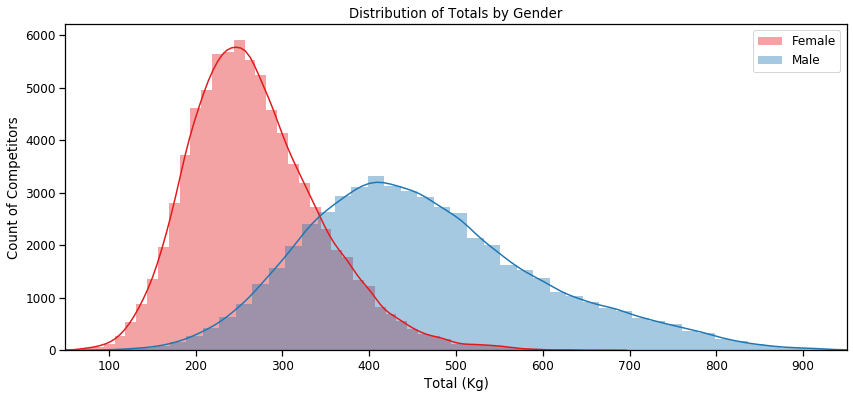

In [15]:
Male_series = clean_df[clean_df['Sex'] == 'M']['TotalKg']
Female_series = clean_df[clean_df['Sex'] == 'F']['TotalKg']

plt.close('all')
plt.figure(figsize = (14, 6))
sns.set_context("notebook", font_scale = 1.1)

sns.distplot(Female_series, label ='Female', color = dred)
sns.distplot(Male_series, label ='Male', color = dblue)
plt.legend()

plt.title('Distribution of Totals by Gender')
plt.yticks([0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006], ['0', '1000', '2000', '3000', '4000', '5000', '6000'])
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.xlim(50, 950)
plt.xlabel('Total (Kg)')
plt.ylabel('Count of Competitors')
plt.show()

This gives us an idea of the distribution. What percent of males would the average (mean) female beat? How about the reverse? let's calculate.

In [16]:
female_mean = Female_series.mean()
male_mean = Male_series.mean()

Mean_male_v_females = stats.percentileofscore(Female_series, male_mean)
Mean_female_v_males = stats.percentileofscore(Male_series, female_mean)
print(f'Average Female Total: {round(female_mean, 1)} kg')
print(f'Average Male Total: {round(male_mean, 1)} kg')
print()
print(f'Average male > {round(Mean_male_v_females, 1)}% of females')
print(f'Average female > {round(Mean_female_v_males, 1)}% of males')

Average Female Total: 269.1 kg
Average Male Total: 461.5 kg

Average male > 98.3% of females
Average female > 5.3% of males


Does this suggest male competitors are stronger than females 98.4% or 94.9% of the time? Actually neither. The **mean** competitor is not the same as a **random** competitor from each. This was just a "fun" detour. To calculate the chances of a random male being stronger than a random female, we have to:
1. Subtract the mean male from the mean female to get D (difference)
2. Calculate the standard deviation of D. = squareroot((female SD)^2 + (male SD)^2)
3. Find the Z-score of 0, in the distribution of D
4. Convert that to a probabilty percentage

In [17]:
D = male_mean - female_mean

female_sd = Female_series.std()
male_sd = Male_series.std()
D_sd = (female_sd**2 + male_sd**2)**0.5

print(f'Average Male Total: {round(male_mean, 1)} kg')
print(f'Average Female Total: {round(female_mean, 1)} kg')
print(f'Difference: {round(D,1)} kg')
print()
print(f'Female Standard Deviation: {round(female_sd, 1)} kg')
print(f'Male Standard Deviation: {round(male_sd, 1)} kg')
print(f"Difference's Standard Deviation: {round(D_sd, 1)} kg")

Average Male Total: 461.5 kg
Average Female Total: 269.1 kg
Difference: 192.4 kg

Female Standard Deviation: 75.8 kg
Male Standard Deviation: 135.2 kg
Difference's Standard Deviation: 155.0 kg


As we can see above, the Difference = 192 kg and the Difference's standard deviation = 154 kg. So -192kg below the mean, is the point at which females lift the same as males. Therefore -192kg/155 kg indicates how many standard deviations that point is.

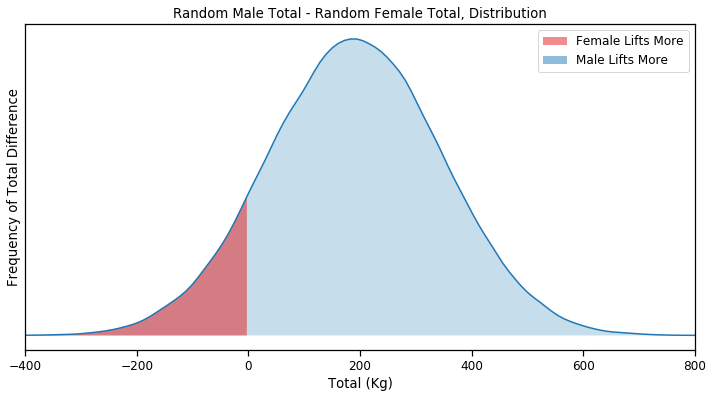

In [18]:
Difference_distribution = np.random.normal(D, D_sd, 100000)
plt.figure(figsize = (12, 6))
sns.set_context("notebook", font_scale = 1.1)

ax = sns.kdeplot(Difference_distribution, color = dblue, shade = True)
line = ax.get_lines()[-1]
x, y = line.get_data()
mask = x < 0
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor= dred, label = 'Female Lifts More')

mask = x >= 0
x, y = x[mask], y[mask]
ax.fill_between(x, y1=y, alpha=0.5, facecolor= dblue, label = 'Male Lifts More')


plt.title('Random Male Total - Random Female Total, Distribution')
# plt.axvline(x = 0, ymax = 0.4, label = '0 kg', color = 'red')
plt.legend()
plt.xlabel('Total (Kg)')
plt.ylabel('Frequency of Total Difference')
plt.yticks([])
plt.xlim(-400, 800)
# plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

plt.show()

In [19]:
z_score = D/D_sd
print(f"Z-score: {round(z_score, 2)}")
print(f"Probability: {round(stats.norm.cdf(z_score)*100,2)}%")

Z-score: 1.24
Probability: 89.28%


**Conclusion:**

We can see that there is an 89.45% chance of the male being stronger, if one competitor from each sex are selected at random.

## Enhanced Competitor Sex Differences




In [20]:
E_Male_series = enhanced_df[enhanced_df['Sex'] == 'M']['TotalKg']
E_Female_series = enhanced_df[enhanced_df['Sex'] == 'F']['TotalKg']

E_D = E_Male_series.mean() - E_Female_series.mean()

E_female_sd = E_Female_series.std()
E_male_sd = E_Male_series.std()
E_D_sd = (E_female_sd**2 + E_male_sd**2)**0.5

print(f'Enhanced Difference: {round(E_D,1)} kg')
print(f"Enhanced Difference's Standard Deviation: {round(E_D_sd, 1)} kg")

Enhanced Difference: 243.5 kg
Enhanced Difference's Standard Deviation: 172.4 kg


Let's calculate the Z-score again for the Difference between sexes of enhanced competitors (243.5 kg) divided by their standard deviation (172.4 kg).

In [21]:
E_z_score = E_D/E_D_sd
print(f"Z-score: {round(E_z_score, 2)}")
print(f"Probability: {round(stats.norm.cdf(E_z_score)*100,2)}%")

Z-score: 1.41
Probability: 92.11%


**Conclusion:**

The probably of a random male being stronger than a random female actually increased from 89.45% to 92.42%, when allowing for performance enhancing drugs.

## Equalizing for Weight
On average males have a weight advantage over females. It intuitively makes sense, that if we control for weight, then the female win% should increase right? Perhaps. When we control for weight, we may generally be adjusting male performance down, however, in the cases where females were stronger, if they weighed more than their male counterpart, normalizing for weight will make them worse off. 

Let's get an initial overview of Totals, this time controlling for weight class.

<Figure size 432x288 with 0 Axes>

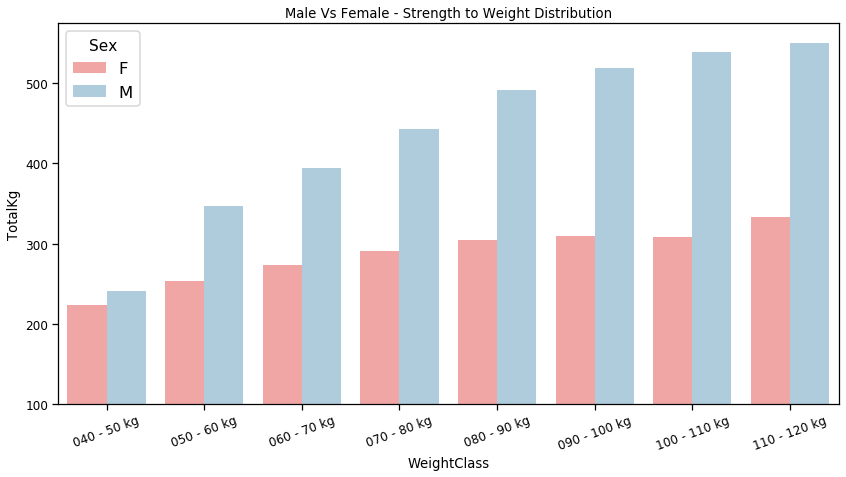

In [22]:
plt.clf()
MvF_df = clean_df.groupby(['WeightClass', 'Sex']).TotalKg.mean().reset_index()
plt.figure(figsize = (14, 7))
sns.set_context("notebook", font_scale = 1.1)
sns.set_palette([lred, lblue])

plt.xticks(rotation =20)
plt.title('Male Vs Female - Strength to Weight Distribution')
sns.set_context("talk")

sns.barplot(data = MvF_df, x = 'WeightClass', y = 'TotalKg', hue = 'Sex')
plt.ylim(100, 575)
plt.show()

Interestingly the 40-50 kg looks to be the most competitive between the sexes. Perhaps they are young and the females there have hit puberty first? Or perhaps non-adult males are competing against fully developed, but same weight females. 

Controlling for age, and finding the weight class with the most similar performance are out of the scope report unfortunately. We need to standardize all competitors based on weight, not merely group them into weight classes. Powerlifters have long pondered this problem, and come up with a [number](https://en.wikipedia.org/wiki/Wilks_Coefficient) of complex formulas to compare competitors controlling for weight, age, sex and even the specific Lift. These are all highly granular, overly customized, and rely on external data and formulas that aren't easily visible to us. A strength equalizer with readable formulas that doesn't reference other data sets would be more ideal for our purposes.

I will do my own approximate conversion and call it the Steven Score, or S_score for short:
1. Total / Body Weight (T/BW), for all competitors
2. Average the T/BW ratio for each weight class and sex
3. Average the T/BW ratio for each weight class, by combining the averages for each sex at that weight class. We do this so that the average for each weight class is not affected by the proportion of male to female competitors
4. Divide the competitors T/BW ration, by their weight class's T/BW ratio. This will result in the S_score

An S_score of 1 indicates the competitor has an exactly average T/BW ration for their weight class. > 1 indicates they are strong for their weight class, and < 1 indicates they are weaker than average for their weight class.

In [47]:
# Make a new table with just Total as the response variable, and then add a Total/BodyWeight column
s_score_df = clean_df.drop(['Best3SquatKg','Best3BenchKg','Best3DeadliftKg'], axis = 1)
s_score_df['T/BW'] = s_score_df['TotalKg']/s_score_df['BodyweightKg']

# Comparing gender unequalized weightclass Total/BodyWeight ratio, to gender equalized one below it
# wc_s_score_df = s_score_df.groupby(['WeightClass'])['T/BW'].mean().reset_index()
# print(wc_s_score_df)
# print()

# Weight controlled, gender equalized WeightClass T/BW ratio Table
wc_s_score_df = s_score_df.groupby(['WeightClass', 'Sex'])['T/BW'].mean().reset_index()
wc_s_score_df = wc_s_score_df.groupby(['WeightClass'])['T/BW'].mean().reset_index()
# print(wc_s_score_df)
wc_s_score_df.columns = ['WeightClass', 'WC-T/BW']

# Add the WeightClass's T/BW ratio to each competitor. 
# Then divide each competitor's T/WB ratio by their WC-T/B to get their S_score.
# drop the two T/BW columns at the end
s_score_df = s_score_df.merge(wc_s_score_df, how='left')
s_score_df['S_score'] = s_score_df['T/BW']/s_score_df['WC-T/BW']
s_score_df.drop(columns = ['T/BW','WC-T/BW'], inplace = True)

# Checking if the data looks like I expect
s_score_df
# s_score_df.groupby(['WeightClass', 'Sex'])['S_score'].mean()

,Name,Sex,TotalKg,BodyweightKg,WeightClass,S_score
0,A Abduzhabarov,M,435.000000,74.000000,070 - 80 kg,1.193749
1,A Akins,M,335.660000,107.050000,100 - 110 kg,0.772865
2,A Allmehat,M,455.000000,72.500000,070 - 80 kg,1.274467
3,A Almeida,F,145.000000,44.000000,040 - 50 kg,0.664647
4,A Ashwin,M,485.000000,81.700000,080 - 90 kg,1.258996
...,...,...,...,...,...,...
145286,齊藤 蒼斗,M,610.000000,73.700000,070 - 80 kg,1.680806
145287,齋藤 怜馬,M,508.333333,91.493333,090 - 100 kg,1.267369
145288,齋藤 恵太,M,610.000000,86.100000,080 - 90 kg,1.502558
145289,齋藤 誠一郎,M,593.750000,92.125000,090 - 100 kg,1.470178


Now let's compare (for a third time) a random male vs random female, but this time looking at the S_score.

In [49]:
E_Male_series = s_score_df[s_score_df['Sex'] == 'M']['S_score']
E_Female_series = s_score_df[s_score_df['Sex'] == 'F']['S_score']

E_D = E_Male_series.mean() - E_Female_series.mean()

E_female_sd = E_Female_series.std()
E_male_sd = E_Male_series.std()
E_D_sd = (E_female_sd**2 + E_male_sd**2)**0.5

print(f'S_score Difference: {round(E_D,2)}')
print(f"S_score Difference's SD: {round(E_D_sd, 2)}")

S_score Difference: 0.378
S_score Difference's SD: 0.382


To calculate the Z-score again for the Difference between sexes of enhanced competitors, divide their mean difference (0.378) by their standard deviation (0.382).

In [51]:
E_z_score = E_D/E_D_sd
print(f"Z-score: {round(E_z_score, 2)}")
print(f"Probability: {round(stats.norm.cdf(E_z_score)*100,3)}%")

Z-score: 0.99
Probability: 83.903%


**Conclusion:**

The probabilty of a random male being stronger than a random female drops (89.45% -> 83.90%) when controlling for weight.

## Strength Differences by Muscle Group
The three Lifts of powerlifting: benchpress, squat and deadlift, use primarily the chest, leg and back muscle groups, respectively. It is a common belief/saying in the powerlifting community that females' ["upper body strength averages around 55% of a male’s and lower body strength around 70%"](https://www.strengthminded.com/what-is-relative-strength/). Is this trend true? and to what extent?

First, let's make a table looking at the average of each lift for each sex. We can then answer the above side question. Then, let's also see what percent of the Total each lift makes up for each class of competitors.

In [27]:
resp_vars = ['Best3SquatKg','Best3BenchKg','Best3DeadliftKg','TotalKg']
MG_averages_df = compete_once_df.groupby(['Tested','Sex'])[resp_vars].mean().reset_index()
MG_averages_df

,Tested,Sex,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,Enhanced,F,116.269102,63.621701,133.124515,304.769231
1,Enhanced,M,207.970837,137.160266,220.532362,548.301604
2,Natural,F,106.814354,55.189425,115.055113,269.082502
3,Natural,M,177.627802,112.787898,187.061009,461.499752


In [28]:
print("Female average strength as a proportion of male's:")
print(f"Upper body(bench press): {round(55.2/112.8 *100, 1)}%")
print(f"Lower body(squat): {round(106.8/177.6 *100, 1)}%")
print(f"Back(deadlift): {round(115.1/187.1 *100, 1)}%")

Female average strength as a proportion of male's:
Upper body(bench press): 48.9%
Lower body(squat): 60.1%
Back(deadlift): 61.5%


In [29]:
MG_percents_df = MG_averages_df[['Tested','Sex']].copy()

for var in resp_vars:
    MG_percents_df[var] = round(MG_averages_df[var]/MG_averages_df['TotalKg']*100, 1)

MG_percents_df['Tested-Sex'] = MG_percents_df['Sex'] + ' - ' + MG_percents_df['Tested']
MG_percents_df.drop(['TotalKg', 'Sex', 'Tested'], axis = 1, inplace=True)
MG_percents_df.columns = ['Squat/legs', 'Bench/chest', 'Deadlift/back', 'Tested-Sex']
MG_percents_df

,Squat/legs,Bench/chest,Deadlift/back,Tested-Sex
0,38.1,20.9,43.7,F - Enhanced
1,37.9,25.0,40.2,M - Enhanced
2,39.7,20.5,42.8,F - Natural
3,38.5,24.4,40.5,M - Natural


If we want to plot this easily, we will need to re-arrange (melt) the data so there is only one response variable per row.

In [30]:
MG_percents_df = pd.melt(frame=MG_percents_df, id_vars = ['Tested-Sex'], value_vars = ['Squat/legs',
    'Bench/chest', 'Deadlift/back'], value_name ="% of Total", var_name = 'Lift')
MG_percents_df = MG_percents_df.sort_values(['Tested-Sex'])
MG_percents_df

,Tested-Sex,Lift,% of Total
0,F - Enhanced,Squat/legs,38.1
4,F - Enhanced,Bench/chest,20.9
8,F - Enhanced,Deadlift/back,43.7
2,F - Natural,Squat/legs,39.7
6,F - Natural,Bench/chest,20.5
10,F - Natural,Deadlift/back,42.8
1,M - Enhanced,Squat/legs,37.9
5,M - Enhanced,Bench/chest,25.0
9,M - Enhanced,Deadlift/back,40.2
3,M - Natural,Squat/legs,38.5


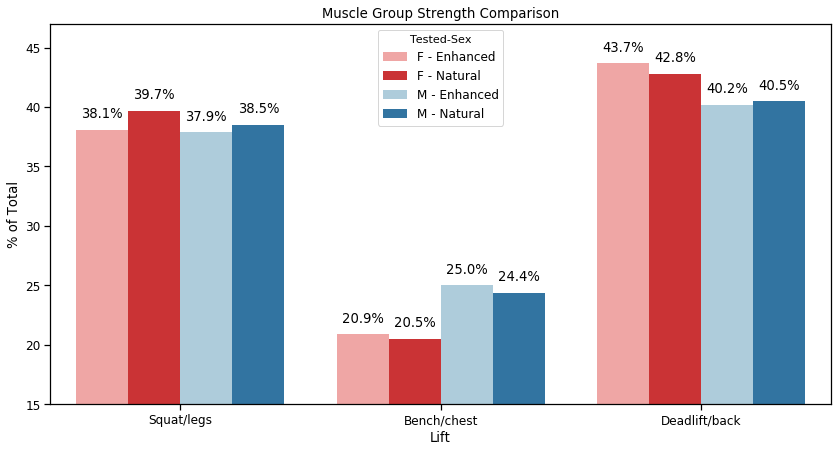

In [31]:
plt.close('all')

def display_figures(ax,df):
    show=df['% of Total'].to_list()
    i=0
    for p in ax.patches:
        h=p.get_height()
        if (h>0):
            value= str(show[i])+"%"
            ax.text(p.get_x()+p.get_width()/2,h+1, value, ha='center')
            i=i+1
            
plt.figure(figsize = (14, 7))
sns.set_context("notebook", font_scale = 1.1)
sns.set_palette([lred, dred, lblue, dblue])

ax = sns.barplot(data = MG_percents_df, x = 'Lift', y = '% of Total', hue ='Tested-Sex')
plt.ylim(15, 47)
plt.title('Muscle Group Strength Comparison')
# plt.yticks([15,25,35,45])
display_figures(ax, MG_percents_df)

plt.show()

**Conclusion:**

We can see that males are disproportionately strong in the benchpress, and females are disproportionately strong at deadlift. We can speculate that female performance will be more similar to that of males in sports which use more back strength, such as rock climbing. The gender differences will be most pronounced in sports that are demanding in arm and chest strength such as boxing.